In [19]:
import numpy as np
class Perceptron(object):
    """
    eta：学习率
    n_iter：权重向量的训练次数
    w_：神经分叉权重向量
    errors_：用于记录神经元判断出错次数
    """
    def __init__(self,eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        pass
    def fit(self,X,y):
        """
        输入训练数据，培训神经元，X为样本向量，y为样本分类
        X：shape[n_samples,n_features]
        X:[[1,2,3],[4,5,6]]
        n_samples=2
        n_features=3
        y=[1,-1]
        """
        """
        初始化权重向量为0
        加1是因为w0，也就是步调函数的阈值
        """
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            """
            X:[[1,2,3],[4,5,6]]
            y:[1,-1]
            zip(X,y) = [[1,2,3,4],[4,5,6,-1]]
            """
            for xi,target in zip(X,y):
                """
                update = n*(y-y')
                """
                update=self.eta * (target-self.predict(xi))
                """
                xi是一个向量
                update * xi等价：
                w(1)=X[1]*update,w(2)=X[2]*update,w(3)=X[3]*update,
                """
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0)
                self.errors_.append(errors)
                pass
            pass
    def net_input(self,X):
        """
        z = W0*1 +W1*X1 + ......+Wn*Xn
        """
        return np.dot(X,self.w_[1:]) + self.w_[0]
        pass
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1)
        pass
    pass
    

In [20]:
file ="./iris.csv"
import pandas as pd 
df = pd.read_csv(file,header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
import matplotlib.pyplot as plt
import numpy as np
#df.loc是按label选取，包括所有的label标签，下面的df.loc[0:99,4]表示取前一百行，包括第一百行，第5列的数据
y = df.loc[0:99,4].values
print(y.shape)
print(y)

(100,)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-ver

In [22]:
#用np.where将y中是'Iris-setosa'的字符串替换成1，其他的替换成-1
y  = np.where(y == 'Iris-setosa',1,-1 )
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [23]:
#此处是按照index提取，不包括第101行，故这里是df.iloc[:100,[0,2]]，而上面是到99
X = df.iloc[:100,[0,2]].values
print(X.shape)
print(X[:10,:])

(100, 2)
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]]


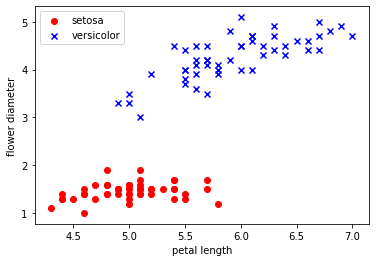

In [24]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('petal length')
plt.ylabel('flower diameter')
plt.legend(loc='upper left')
plt.show()

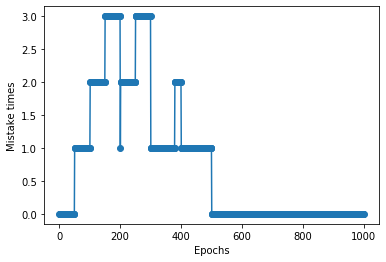

In [25]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mistake times')
plt.show()

In [26]:
from matplotlib.colors import ListedColormap
def plot_decesion_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max()
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max()
    cmap = ListedColormap(colors[:len(np.unique(y))])
    print(x1_min,x1_max)
    print(x2_min,x2_max)
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #print(np.arange(x1_min,x1_max,resolution).shape)
    #print(np.arange(x1_min,x1_max,resolution))
    #print(np.arange(x2_min,x2_max,resolution).shape)
    #print(np.arange(x2_min,x2_max,resolution))
    #print(xx1.shape)
    #print(xx1)
    #print(xx2.shape)
    #print(xx2)
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    print(xx1.ravel())
    print(xx2.ravel())
    print(Z)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0], y = X[y==cl,1],alpha=0.8,cmap=cmap(idx),marker=markers[idx],label=cl)

3.3 7.0
0.0 5.1
[3.3  3.32 3.34 ... 6.94 6.96 6.98]
[0.   0.   0.   ... 5.08 5.08 5.08]
[ 1  1  1 ... -1 -1 -1]


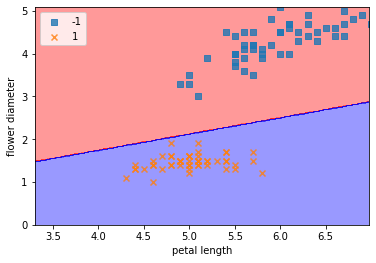

In [27]:
plot_decesion_regions(X,y,ppn,resolution=0.02)
plt.xlabel('petal length')
plt.ylabel('flower diameter')
plt.legend(loc='upper left')
plt.show()